In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("property_data.csv")

#Step 1 : Data Cleaning

#Removing duplicates
df = df.drop_duplicates()

#Removing leading and trailing spaces
df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)

# Calculating percentage of missing data in each column
missing_percentage = df.isnull().sum() * 100 / len(df)
print("Percentage of missing data in each column: ")
print(missing_percentage)

# fill missing values with a specific value
df.loc[:, df.dtypes == np.float64] = df.loc[:, df.dtypes == np.float64].fillna(0)
df.loc[:, df.dtypes == np.int64] = df.loc[:, df.dtypes == np.int64].fillna(0)
df.loc[:, df.dtypes == object] = df.loc[:, df.dtypes == object].fillna('unknown')
print(df.head())

#Step 2 : Data Analysis

# Get the number of rows and columns using df.shape
rows, cols = df.shape
print(f"The dataset has {rows} rows and {cols} columns.")

#better to make one for belgium and

def get_region(zip_code):
    if 1000 <= zip_code <= 1299:
        return 'Brussels-Capital'
    elif 1300 <= zip_code <= 1499:
        return 'Walloon Brabant'
    elif (1500 <= zip_code <= 1999) or (3000 <= zip_code <= 3499):
        return 'Flemish Brabant'
    elif 2000 <= zip_code <= 2999:
        return 'Antwerp'
    elif 3500 <= zip_code <= 3999:
        return 'Limburg'
    elif 4000 <= zip_code <= 4999:
        return 'Liege'
    elif 5000 <= zip_code <= 5999:
        return 'Namur'
    elif (6000 <= zip_code <= 6599) or (7000 <= zip_code <= 7999):
        return 'Hainaut'
    elif 6600 <= zip_code <= 6999:
        return 'Luxembourg'
    elif 8000 <= zip_code <= 8999:
        return 'West Flanders'
    elif 9000 <= zip_code <= 9999:
        return 'East Flanders'


# Ensure that the 'Zip code' column is in integer format
df['Zip code'] = df['Zip code'].astype(int)

# Map the 'Zip code' column to regions
df['Region'] = df['Zip code'].apply(get_region)

# Convert 'Price of property in euro' and 'Zip code' to numeric, handling errors
df['Price of property in euro'] = pd.to_numeric(df['Price of property in euro'], errors='coerce')
df['Zip code'] = pd.to_numeric(df['Zip code'], errors='coerce')

# Drop any rows with NaN values resulting from the above conversion
df = df.dropna(subset=['Price of property in euro', 'Zip code'])





Percentage of missing data in each column: 
Raw num:                                99.937355
Locality                                 0.062645
Zip code                                 0.062645
Kitchen                                 11.947378
Type of property                         0.062645
Subtype of property                      0.062645
Price of property in euro                0.062645
Type of Sale                            77.868266
Number of bedrooms                       0.062645
Living area                              1.700376
Terrace                                 25.747270
Terrace area                            48.433864
Garden                                  73.993198
Garden area                             73.993198
Surface of the land(or plot of land)    47.932701
Number of facades                       18.856273
Swimming pool                           96.778235
ID number                                0.062645
State of the building                   11.231430
URL   

Average property prices by Region and Property Type in Belgium

The most expensive one is for aprtment is West-Flanders
The most expensive one is fo house is Brussels-Capital

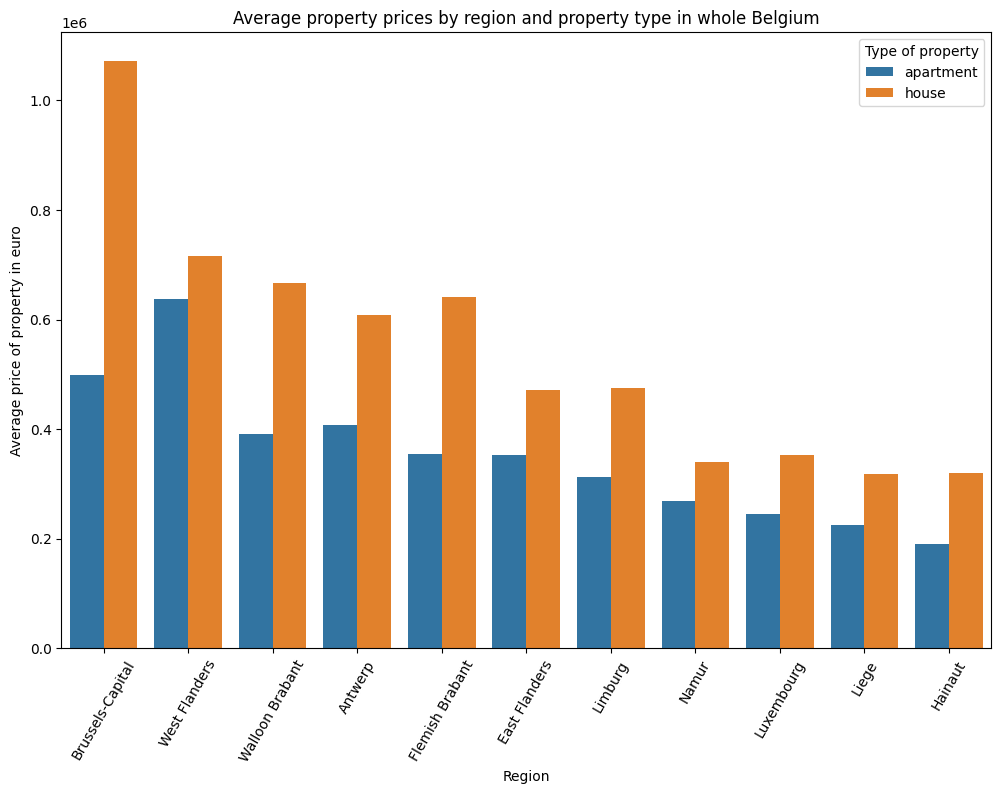

In [3]:
# Calculate the average price for each property type in each region
avg_prices = df.groupby(['Region', 'Type of property'])['Price of property in euro'].mean().reset_index()

# Calculate the overall average price for each region and sort by it
order = avg_prices.groupby('Region')['Price of property in euro'].mean().sort_values(ascending=False).index

# Create a barplot
plt.figure(figsize=(12, 8))
sns.barplot(data=avg_prices, x='Region', y='Price of property in euro', hue='Type of property', order=order)

plt.xticks(rotation=60)  # Rotate x labels for readability
plt.title('Average property prices by region and property type in whole Belgium')
plt.ylabel('Average price of property in euro')
plt.xlabel('Region')

plt.legend(title='Type of property')
plt.show()


Median price for propertis in whole Belgium

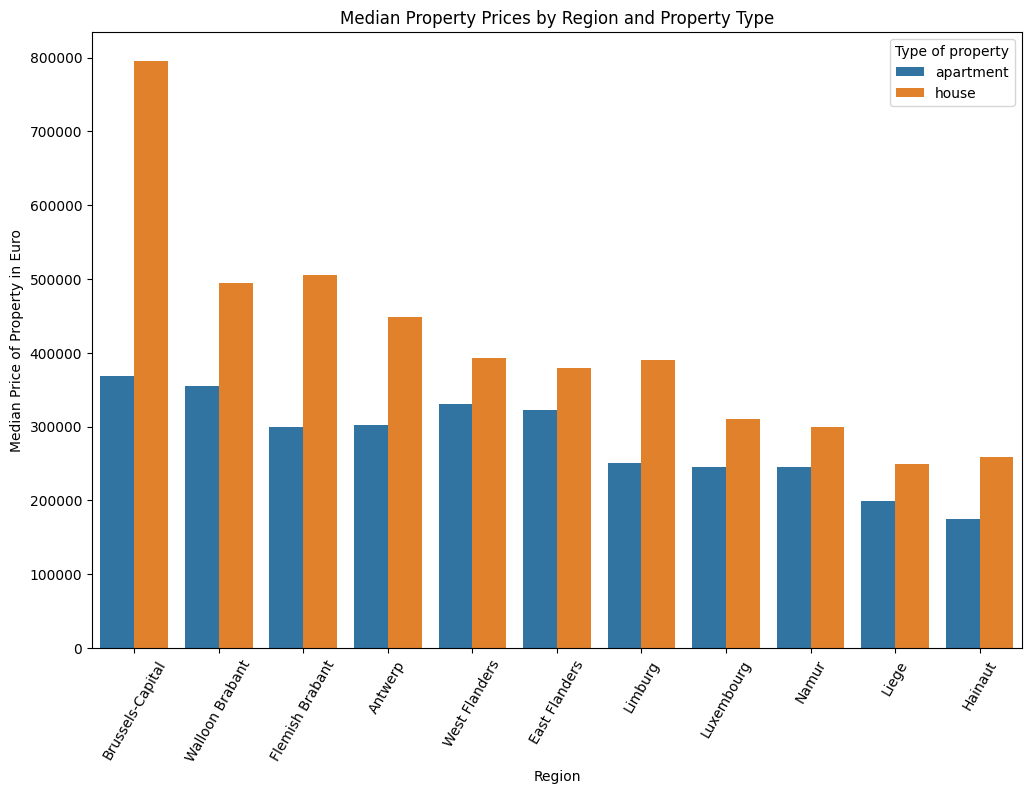

In [4]:
# Calculate the median price for each property type in each region
median_prices = df.groupby(['Region', 'Type of property'])['Price of property in euro'].median().reset_index()

# Calculate the overall median price for each region and sort by it
order = median_prices.groupby('Region')['Price of property in euro'].median().sort_values(ascending=False).index

# Create a barplot
plt.figure(figsize=(12, 8))
sns.barplot(data=median_prices, x='Region', y='Price of property in euro', hue='Type of property', order=order)

plt.xticks(rotation=60)  # Rotate x labels for readability
plt.title('Median Property Prices by Region and Property Type')
plt.ylabel('Median Price of Property in Euro')
plt.xlabel('Region')

plt.legend(title='Type of property')
plt.show()




Price per square meter in whole Belgium

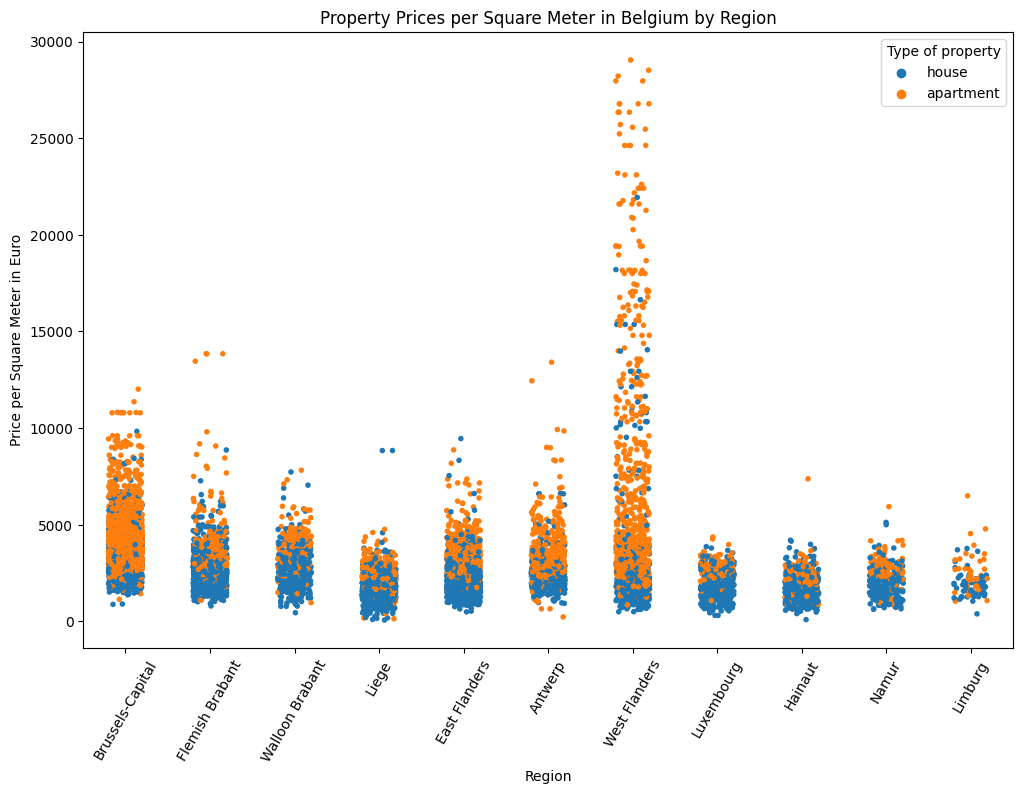

In [12]:
# Calculate price per square meter
df['Living area'] = pd.to_numeric(df['Living area'], errors='coerce')  # ensure the 'Living area' column is numeric
df['Price per square meter'] = df['Price of property in euro'] / df['Living area']

# Drop any rows with NaN values resulting from the above calculation
df = df.dropna(subset=['Price per square meter'])

# Create a scatter plot
plt.figure(figsize=(12, 8))
sns.stripplot(data=df, x='Region', y='Price per square meter', hue='Type of property', jitter=0.2, size=4)

plt.xticks(rotation=60)  # Rotate x labels for readability
plt.title('Property Prices per Square Meter in Belgium by Region')
plt.ylabel('Price per Square Meter in Euro')
plt.xlabel('Region')

plt.legend(title='Type of property')
plt.show()

